### 1. 이동평균

In [2]:
import numpy as np
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline
plt.figure(figsize=(15,9))
today = date.today()
startday = date(2018,4,1)
endday = date(2018,6,27)
SEC = web.DataReader("207940", startday, endday)
SEC = SEC[SEC['Volume'] != 0]
SEC['Close'].head()

Date
2018-04-02    486000
2018-04-03    485500
2018-04-04    503000
2018-04-05    502000
2018-04-06    519000
Name: Close, dtype: int64

In [3]:
SEC['MA_5']=SEC['Close'].rolling(window=5).mean()
SEC['MA_20']=SEC['Close'].rolling(window=20).mean()
SEC['diff']=SEC['MA_5']-SEC['MA_20']
SEC.tail(5)

,Close,Open,High,Low,Volume,Change,MA_5,MA_20,diff
Date,,,,,,,,,
2018-06-21,415000,420000,426000,411000,152920.0,-0.0119,406300.0,419600.0,-13300.0
2018-06-22,437500,419500,445500,415500,344810.0,0.0542,412200.0,421500.0,-9300.0
2018-06-25,420500,438000,438500,418000,165000.0,-0.0389,414800.0,421625.0,-6825.0
2018-06-26,416000,410000,419000,400500,217020.0,-0.0107,421800.0,420900.0,900.0
2018-06-27,418000,414500,426500,413000,115660.0,0.0048,421400.0,420350.0,1050.0


### 2. 골든크로스, 데드크로스

In [4]:
# - 단기와 장기 이동평균의 차이값(MA_5, MA_20)비교
# - 크로스: 차이값 X 이전 차이값 < 0 (이전 값과 부호가 바뀌는 경우)
# - 골드크로스 (음의 값 → 양의 값) → Buy
# - 데드크로스 (양의 값 → 음의 값) → Sell

In [5]:
# 단기 – 장기 이동평균 > 0 → Buy
# 단기 – 장기 이동평균 < 0 → Sell

In [7]:
import matplotlib
import matplotlib.font_manager as fm
font_location = "c:/windows/fonts/H2GTRE.TTF"
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

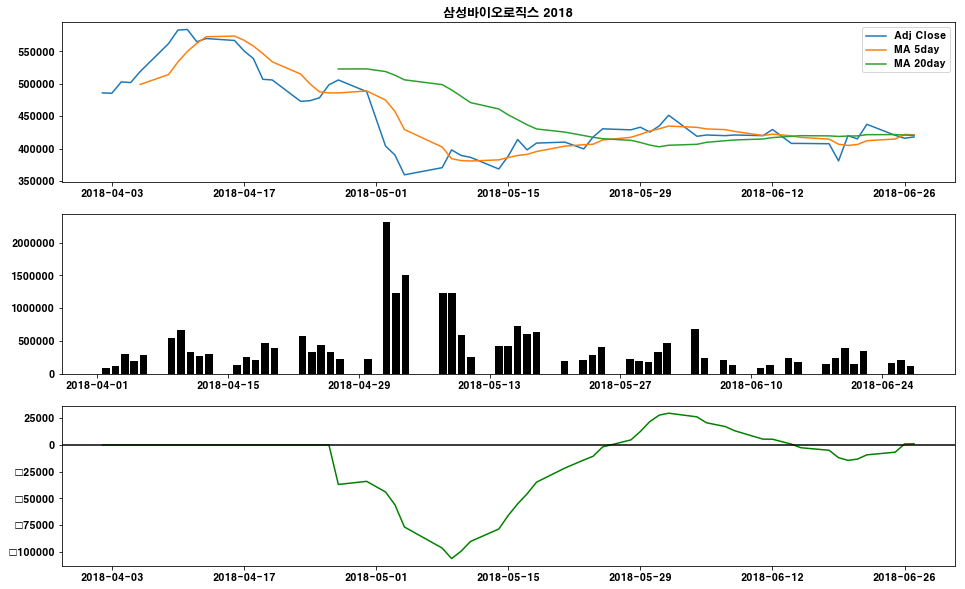

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (16,10))

#price (가격)
plt.subplot(311)
plt.plot(SEC.index, SEC['Close'], label = 'Adj Close')
plt.plot(SEC.index, SEC['MA_5'], label='MA 5day')
plt.plot(SEC.index, SEC['MA_20'], label='MA 20day')
plt.title(u'삼성바이오로직스 2018')
plt.legend(loc='best')

# volume (거래량)
plt.subplot(312)
plt.bar(SEC.index, SEC['Volume'], color='black')

#  이동평균 차이 (diff)
diffChart = plt.subplot(313)
diffChart.plot(SEC.index, SEC['diff'].fillna(0), color='g')
plt.axhline(y=0, color='k')

In [9]:
매도/매수 타이밍 확이(+:살때, =: 팔때)

SyntaxError: invalid syntax (<ipython-input-9-c0d9ee2f1b8b>, line 1)

In [1]:
import heatmap
import random

hm = heatmap.Heatmap()
pts = [(random.uniform(-77.012, -77.050), random.uniform(38.888, 38.910)) for x in range(100)]
hm.heatmap(pts)
hm.saveKML("data.kml")

ModuleNotFoundError: No module named 'heatmap'